# Cluster Overlap Results 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
#import plotly.express as px


from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

#Import classes
from classes_script import PcaAnalyzer, ClustererPcad, GrapherPcad
from graph_script import run_plots


import plotly.express as px


In [5]:
df=pd.read_csv('./data/final_clustered_extra_cols.csv',index_col=0)
for i in range(3): #KM
    for j in range(3):#GM
        num = len(set(df[df['KM3']==i].index)&set(df[df['GM3']==j].index))
        if num > 5:
            print(f"Number of customers in KM cluster {i} and GM cluster {j}: {num}")
# print(set(df[df['KM3']==0].index)&set(df[df['GM3']==0].index))
# print(len(set(df[df['KM3']==2].index)&set(df[df['GM3']==2].index)))

Number of customers in KM cluster 0 and GM cluster 0: 759
Number of customers in KM cluster 1 and GM cluster 0: 79
Number of customers in KM cluster 1 and GM cluster 1: 815
Number of customers in KM cluster 2 and GM cluster 0: 124
Number of customers in KM cluster 2 and GM cluster 2: 450


## GMM description
- FORTHCOMING

In [5]:
def plot_counts(data,label):
    # Code hint from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
    plt.figure(figsize=(9, 7))

    ax = sns.countplot(x=data[label], data=data,hue=None,color='#4503fc',order=data[label].value_counts(ascending=False).index);
            
    abs_values = data[label].value_counts(ascending=False)
    rel_values = data[label].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title("Cluster Sizes")



#### Will need this function in the groupby analyses that follow

In [6]:
def total_spent_by_cluster(data,cluster_lab, norm=False):
    norm_lab='Norm' if norm else ""

    n_clusters = data[cluster_lab].nunique()

    cluster_mnt_totals = [[]]*n_clusters

    for i in range(n_clusters):
        cluster_i=data[data[cluster_lab]==i]
        cluster_mnt_totals[i] = cluster_i.MntSpentNorm.mean()*len(cluster_i) if  norm else cluster_i.MntTotal.mean()*len(cluster_i)

    print(cluster_mnt_totals) 

    columns = ['cluster'+str(i) for i in range(n_clusters)]
    print(columns)

    df_cluster_mnt_totals = pd.DataFrame([cluster_mnt_totals], columns = ['cluster'+str(i) for i in range(n_clusters)])

    df_cluster_mnt_totals=df_cluster_mnt_totals.T.reset_index().rename({0:f'TotalAmountSpent{norm_lab}'},axis=1)

    df_cluster_mnt_totals.sort_values(f'TotalAmountSpent{norm_lab}', ascending=False).plot.bar(color='#4503fc')
    #plt.savefig('./figures/total_spent.png')


In [7]:
df.describe()

,ID,KM3,GM3,MntTotal,MntSpentNorm,Income,Len_Customer,HasChildren,HasPartner,NumChildren,age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpTot,Response,Complain,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumTotalPurchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response.1,Complain.1,KM2,AC3,AC2,GM2,LogIncome,MntWinesNorm,MntFruitsNorm,MntMeatProductsNorm,MntFishProductsNorm,MntSweetProductsNorm,MntGoldProdsNorm,NumDealsPurchasesNorm,NumWebPurchasesNorm,NumStorePurchasesNorm,NumWebVisitsMonthNorm,NumCatalogPurchasesNorm,SpendPropOfTotal,AvgPerPurchase,NumTotalPurchasesNorm
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.00000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,5589.296097,0.916106,1.228802,605.541050,1.652585,51619.504262,450.777479,0.716016,0.644235,0.951996,45.111261,0.064603,0.013459,0.073127,0.074921,0.072678,0.298789,0.149843,0.008973,1968.888739,0.444594,0.507402,49.106326,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,20.20323,2.319874,4.100045,2.636608,5.812472,5.334231,0.149843,0.008973,0.470166,0.656797,0.533423,0.459399,10.749553,0.818573,0.074516,0.460445,0.106404,0.075355,0.117292,0.006314,0.011353,0.016613,0.014840,0.007382,0.020761,26.840943,0.056501
std,3244.840538,0.769513,0.763070,601.032228,2.171865,20601.216248,202.248700,0.451030,0.478852,0.751976,11.707430,0.245879,0.115255,0.260403,0.263324,0.259666,0.679597,0.356998,0.094319,11.707430,0.538636,0.544735,28.946476,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,7.23009,1.895252,2.775461,2.796161,3.242144,2.414981,0.356998,0.094319,0.499221,0.778541,0.498994,0.498461,0.496424,1.119062,0.146868,0.771058,0.205539,0.145509,0.188556,0.006981,0.011189,0.014303,0.012084,0.010395,0.028764,43.424736,0.038231
min,0.000000,0.000000,0.000000,5.000000,0.009276,1730.000000,97.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.456455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000393,0.228571,0.001277
25%,2829.000000,0.000000,1.000000,69.000000,0.202899,35416.000000,278.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1959.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,14.00000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.474947,0.067873,0.003565,0.042857,0.006319,0.003623,0.022487,0.002571,0.004808,0.007194,0.008152,0.000000,0.005331,5.000000,0.032000
50%,5455.000000,1.000000,1.000000,397.000000,0.867257,51381.500000,453.000000,1.000000,1.000000,1.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,19.00000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.847053,0.418900,0.019920,0.152455,0.028777,0.020000,0.057441,0.004622,0.008671,0.012658

## Groupby and Total Spent Analyses

### GMM with 3 Clusters

In [8]:
LABEL='GM3'

In [9]:
groupsByCluster=df.groupby([LABEL])#.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])
groupsByCluster.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

ID                                                 KM3               \
    count      sum min    max         mean          std count  sum min max   
GM3                                                                          
0     452  2559469   0  11101  5662.542035  3205.219261   452  900   0   2   
1     815  4643574  13  11191  5697.636810  3217.877052   815  815   1   1   
2     962  5255498   1  11176  5463.095634  3284.816367   962  327   0   2   

                        MntTotal                                              \
         mean       std    count     sum  min   max         mean         std   
GM3                                                                            
0    1.991150  0.132890      452  639552  461  2525  1414.938053  413.828559   
1    1.000000  0.000000      815   49831    5   373    61.142331   40.677063   
2    0.339917  0.694746      962  660368    9  2194   686.453222  435.548787   

    MntSpentNorm                                                       Income  \
           count          sum       min        max      mean       std  count   
GM3                                                                             
0            452  1929.939958  0.819749  19.788991  4.269779  2.881446    452   
1            815   151.021093  0.009276   1.260135  0.185302  0.149402    815   
2            962  1602.650818  0.087379  12.669065  1.665957  1.404579    962   

                                                               Len_Customer  \
            sum      min       max          mean           std        count   
GM3                                                                           
0    34827702.5  44953.0  105471.0  77052.439159   9280.880031          452   
1    25815384.0   1730.0   61917.0  31675.317791  10996.097129          815   
2    54416788.5   2447.0  113734.0  56566.308212  13230.597083          962   

                                                   HasChildren               \
          sum   min    max        mean         std       count  sum min max   
GM3                                                                           
0    197258.0  98.0  795.0  436.411504  204.814131         452    9   0   1   
1    335504.0  97.0  794.0  411.661350  197.084420         815  731   0   1   
2    472021.0  97.0  796.0  490.666320  198.138659         962  856   0   1   

                        HasPartner                                   \
         mean       std      count  sum min max      mean       std   
GM3                                                                   
0    0.019912  0.139851        452  268   0   1  0.592920  0.491834   
1    0.896933  0.304234        815  528   0   1  0.647853  0.477933   
2    0.889813  0.313286        962  640   0   1  0.665281  0.472138   

    NumChildren                                     age                 \
          count   sum min max      mean       std count    sum min max   
GM3                                                                      
0           452     9   0   1  0.019912  0.139851   452  20643  19  73   
1           815  1033   0   3  1.267485  0.695447   815  33581  18  68   
2           962  1080   0   3  1.122661  0.608239   962  46329  22  74   

                          AcceptedCmp1                                   \
          mean        std        count  sum min max      mean       std   
GM3                                                                       
0    45.670354  14.171259          452  106   0   1  0.234513  0.424164   
1    41.203681  10.466173          815    0   0   0  0.000000  0.000000   
2    48.159044  10.408847          962   38   0   1  0.039501  0.194885   

    AcceptedCmp2                                 AcceptedCmp3              \
           count sum min max      mean       std        count sum min max   
GM3                                                                         
0            452  12   0   1  0.026549  0.160938          452  36 

- KM3 results
- Cluster 2 spends most, has highest income, way fewer kids (but most likely to have a partner)
- make fewer purchases than Cluster 0, but double spending per person
- Campaigns 1 and 5 were most successful with them
- 46 yrs old on average, compared to 48 for Cluster 0  and 42 for Cluster 2

- Figure out how much each cluster spends

[639552.0, 49831.0, 660368.0]
['cluster0', 'cluster1', 'cluster2']


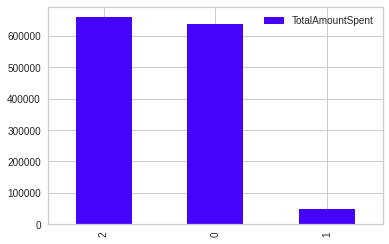

In [10]:
total_spent_by_cluster(data=df,cluster_lab=LABEL)

[1929.9399581581583, 151.02109276323716, 1602.650818358213]
['cluster0', 'cluster1', 'cluster2']


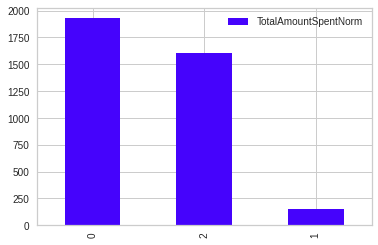

In [11]:
total_spent_by_cluster(data=df,cluster_lab=LABEL,norm=True)

<AxesSubplot:title={'center':'Number of Customers by Cluster'}>

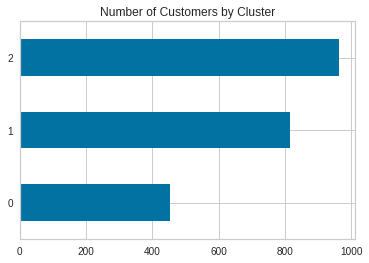

In [12]:
df[LABEL].value_counts().sort_values().plot(kind = 'barh',title="Number of Customers by Cluster")

<!-- # Description of Customer Behavior
- Clusters 2 and 4 are big clusters that spend little
- Clusters 2 and 4  are usually educated, relatively recent customers, but are much more likely to have children than Clusters 1 and 3. Perhaps this store focuses on high-end more expensive products (Whole Foods at Monterey?) and people with children are finding it harder to afford shopping there, on average.  Cluster 5 customers have about just as likely to have children as Clusters 2 and 4, yet have a higher income.  
- To confirm these findings, Clusters 2, 4, and 5 are making the most deal purchases, especially when these are normalized by length someone spend as a customer.
 -->

### GMM with 3 Clusters

In [14]:
groupsByCluster=df.groupby([LABEL])#.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])
#groupsByCluster.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])
groupsByCluster.agg(['sum','mean', 'min', 'max', 'std'])

ID                                       KM3                    \
         sum         mean min    max          std  sum      mean min max   
GM3                                                                        
0    2559469  5662.542035   0  11101  3205.219261  900  1.991150   0   2   
1    4643574  5697.636810  13  11191  3217.877052  815  1.000000   1   1   
2    5255498  5463.095634   1  11176  3284.816367  327  0.339917   0   2   

              MntTotal                                     MntSpentNorm  \
          std      sum         mean  min   max         std          sum   
GM3                                                                       
0    0.132890   639552  1414.938053  461  2525  413.828559  1929.939958   
1    0.000000    49831    61.142331    5   373   40.677063   151.021093   
2    0.694746   660368   686.453222    9  2194  435.548787  1602.650818   

                                                  Income                \
         mean       min        max       std         sum          mean   
GM3                                                                      
0    4.269779  0.819749  19.788991  2.881446  34827702.5  77052.439159   
1    0.185302  0.009276   1.260135  0.149402  25815384.0  31675.317791   
2    1.665957  0.087379  12.669065  1.404579  54416788.5  56566.308212   

                                     Len_Customer                           \
         min       max           std          sum        mean   min    max   
GM3                                                                          
0    44953.0  105471.0   9280.880031     197258.0  436.411504  98.0  795.0   
1     1730.0   61917.0  10996.097129     335504.0  411.661350  97.0  794.0   
2     2447.0  113734.0  13230.597083     472021.0  490.666320  97.0  796.0   

                HasChildren                             HasPartner            \
            std         sum      mean min max       std        sum      mean   
GM3                                                                            
0    204.814131           9  0.019912   0   1  0.139851        268  0.592920   
1    197.084420         731  0.896933   0   1  0.304234        528  0.647853   
2    198.138659         856  0.889813   0   1  0.313286        640  0.665281   

                      NumChildren                                age  \
    min max       std         sum      mean min max       std    sum   
GM3                                                                    
0     0   1  0.491834           9  0.019912   0   1  0.139851  20643   
1     0   1  0.477933        1033  1.267485   0   3  0.695447  33581   
2     0   1  0.472138        1080  1.122661   0   3  0.608239  46329   

                                  AcceptedCmp1                              \
          mean min max        std          sum      mean min max       std   
GM3                                                                          
0    45.670354  19  73  14.171259          106  0.234513   0   1  0.424164   
1    41.203681  18  68  10.466173            0  0.000000   0   0  0.000000   
2    48.159044  22  74  10.408847           38  0.039501   0   1  0.194885   

    AcceptedCmp2                             AcceptedCmp3                    \
             sum      mean min max       std          sum      mean min max   
GM3                                                                           
0             12  0.026549   0   1  0.160938           36  0.079646   0   1   
1              2  0.002454   0   1  0.049507           58  0.071166   0   1   
2             16  0.016632   0   1  0.127955           69  0.071726   0   1   

              AcceptedCmp4                             AcceptedCmp5            \
          std          sum      mean min max       std          sum      mean   
GM3                                                                             
0    0.271044           55  0.121681   0   1  0.327280          128  0.283186   
1    0

- GM3 results:
- Cluster 2 spends most, has highest income, way fewer kids (but most likely to have a partner)
- make fewer purchases than Cluster 0, but double spending per person
- Campaigns 1 and 5 were most successful with them
- 46 yrs old on average, compared to 48 for Cluster 0  and 42 for Cluster 2

- Figure out how much each cluster spends

[639552.0, 49831.0, 660368.0]
['cluster0', 'cluster1', 'cluster2']


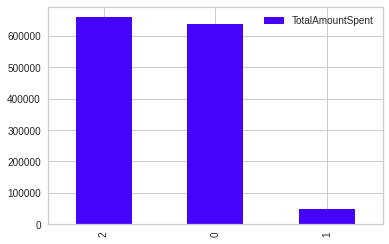

In [15]:
total_spent_by_cluster(data=df,cluster_lab=LABEL)

[1929.9399581581583, 151.02109276323716, 1602.650818358213]
['cluster0', 'cluster1', 'cluster2']


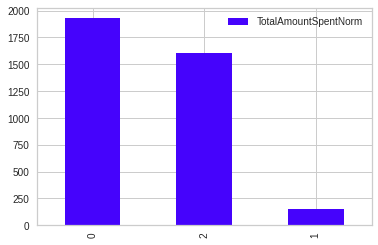

In [16]:
total_spent_by_cluster(data=df,cluster_lab=LABEL,norm=True)

<AxesSubplot:title={'center':'Number of Customers by Cluster'}>

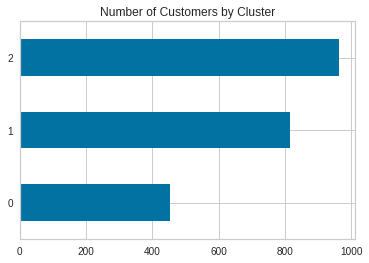

In [17]:
df[LABEL].value_counts().sort_values().plot(kind = 'barh',title="Number of Customers by Cluster")

<!-- # Description of Customer Behavior
- Clusters 2 and 4 are big clusters that spend little
- Clusters 2 and 4  are usually educated, relatively recent customers, but are much more likely to have children than Clusters 1 and 3. Perhaps this store focuses on high-end more expensive products (Whole Foods at Monterey?) and people with children are finding it harder to afford shopping there, on average.  Cluster 5 customers have about just as likely to have children as Clusters 2 and 4, yet have a higher income.  
- To confirm these findings, Clusters 2, 4, and 5 are making the most deal purchases, especially when these are normalized by length someone spend as a customer.
 -->

### Graphs for Clusters

##### Add additional variables to see if length as customer reverses results of some category spending

--------------------Producing plots for GM3--------------------
CLUSTERING RESULTS OVER AMOUNT SPENT AND LENGTH AS CUSTOMER
Income vs Total Amount Plot


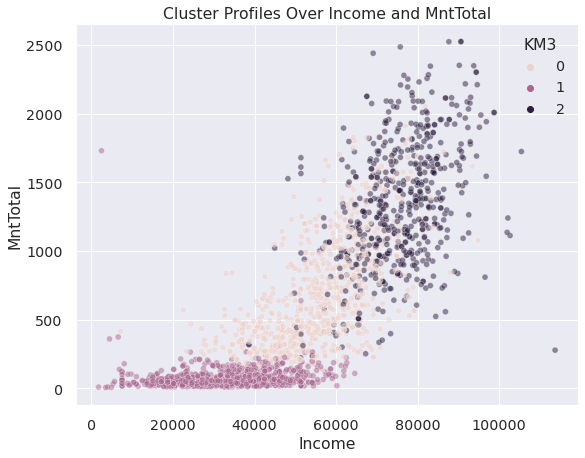

Income vs Total Normalized Amount Plot


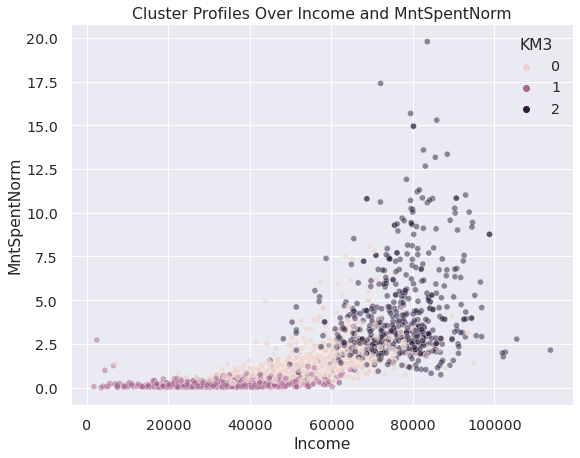

CLUSTERINS OVER DEMOGRAPHIC VARIABLES
EXAMINE DEALS AND CAMPAIGNS
CLUSTERS OVER CAMPAIGNS
CLUSTERS OVER PURCHASE MEDIUM
CLUSTERS OVER PRODUCT TYPE
CLUSTERS OVER RECENCY


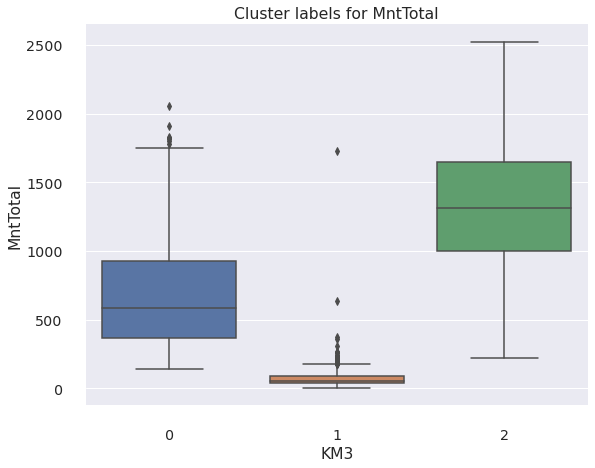

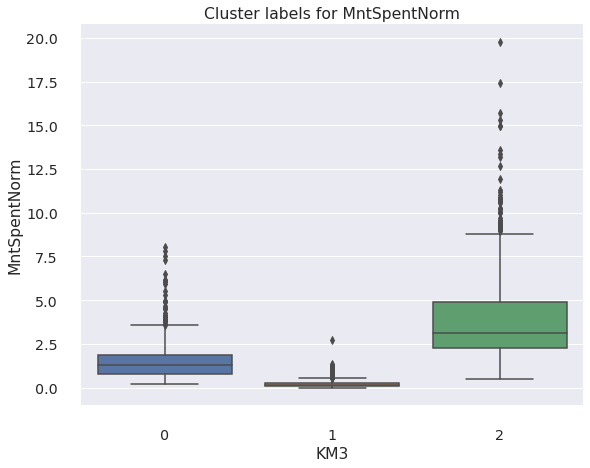

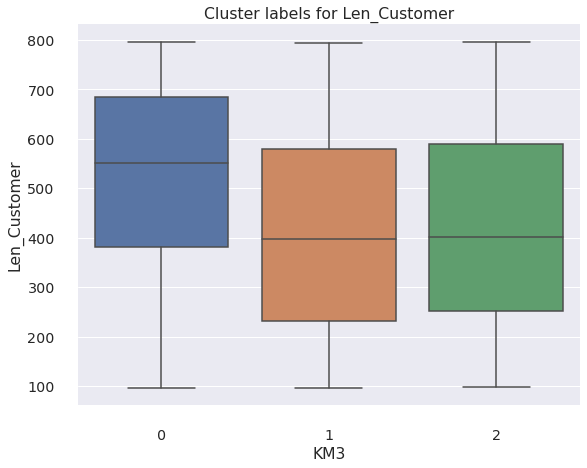

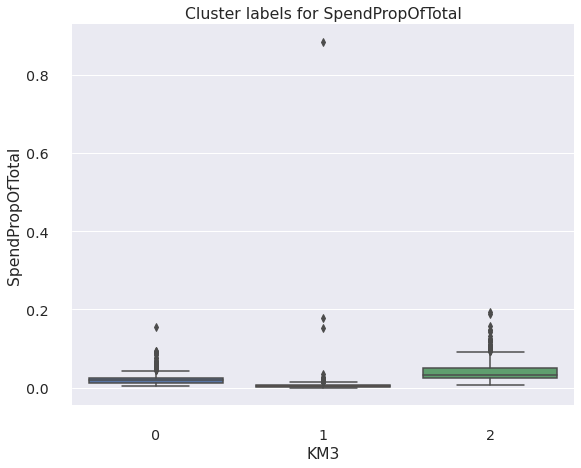

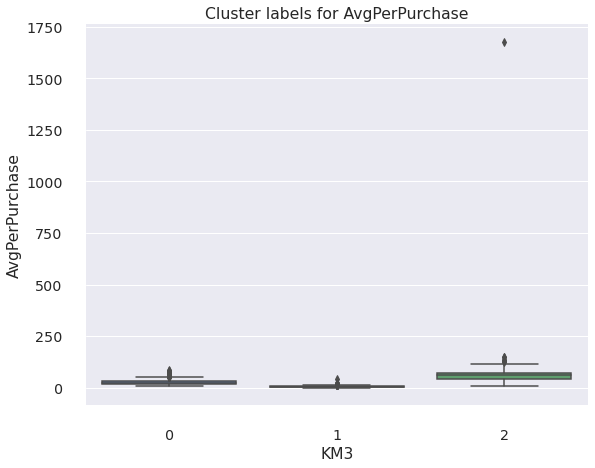

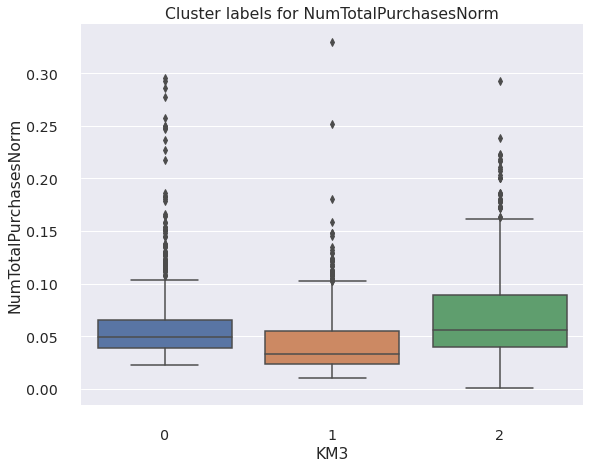

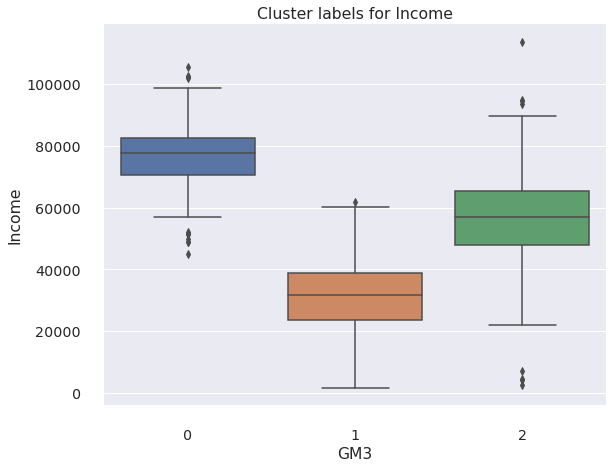

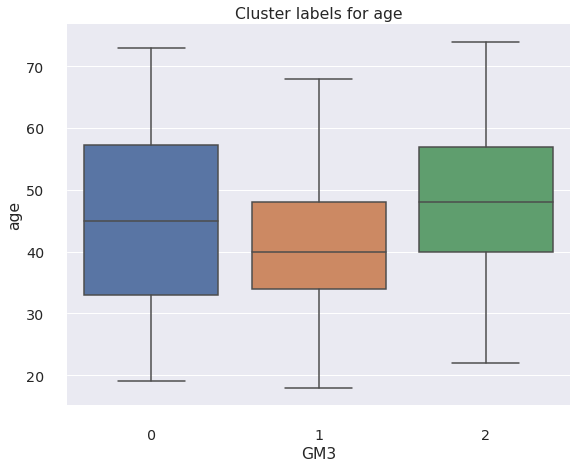

posx and posy should be finite values
posx and posy should be finite values


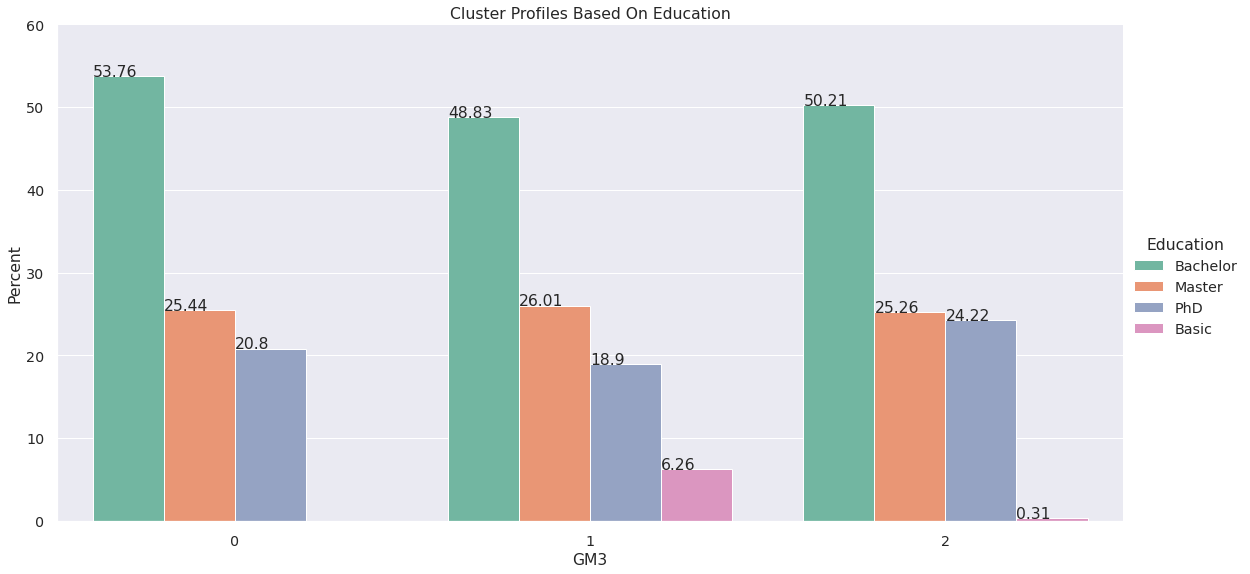

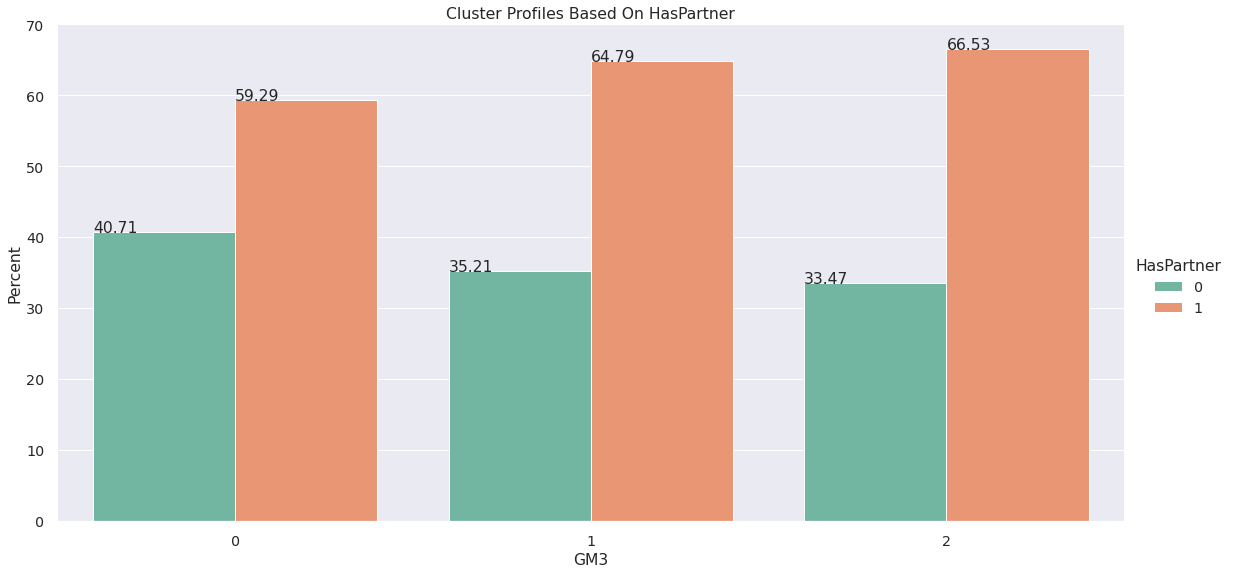

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


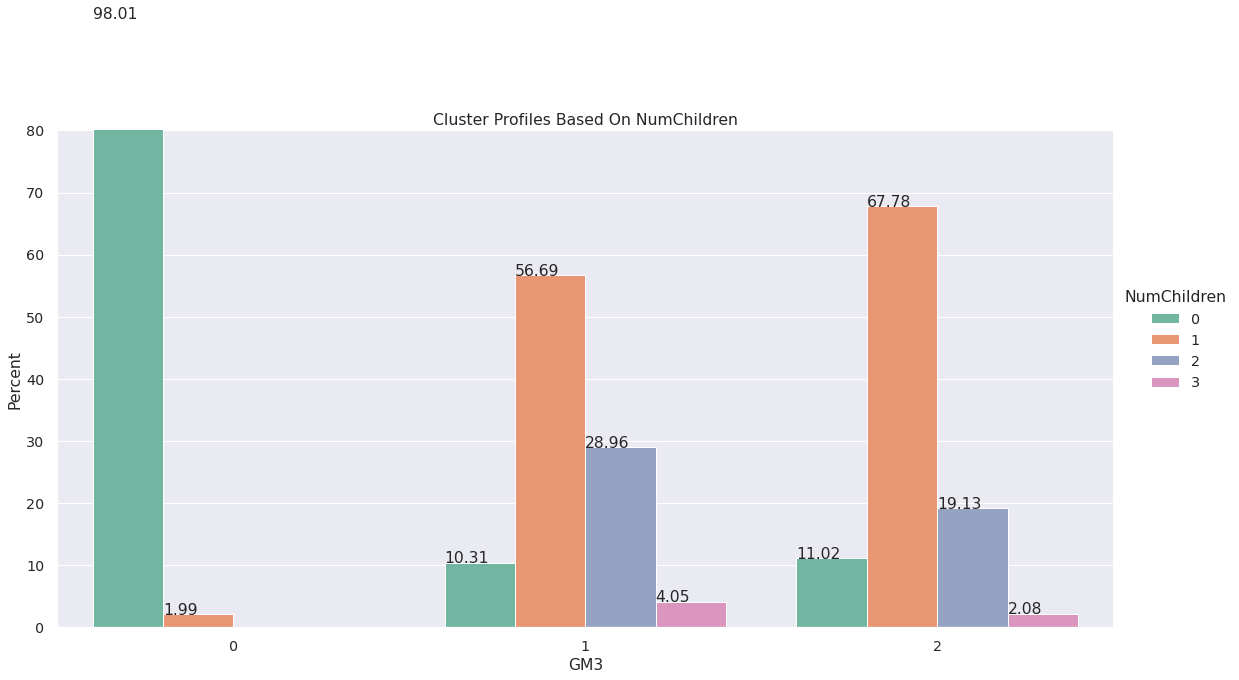

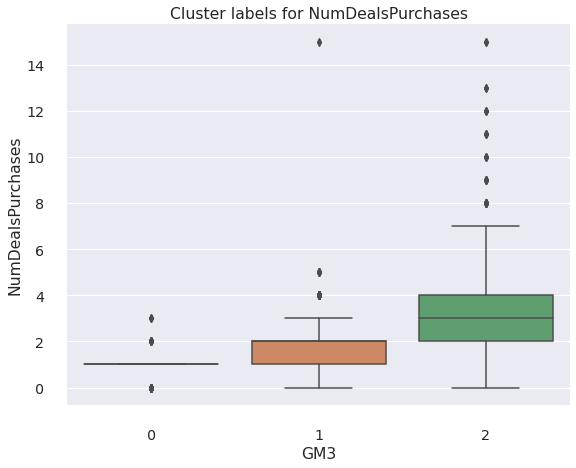

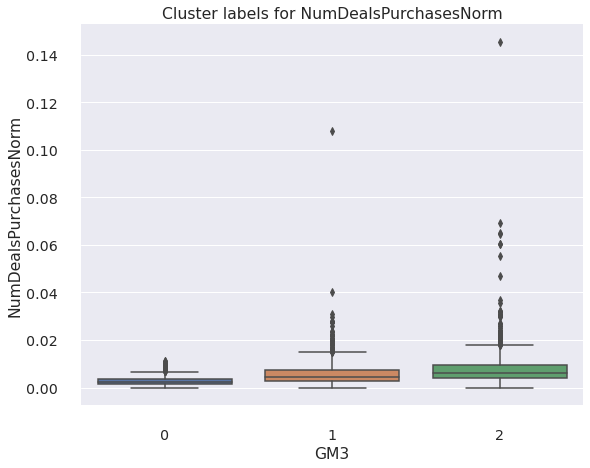

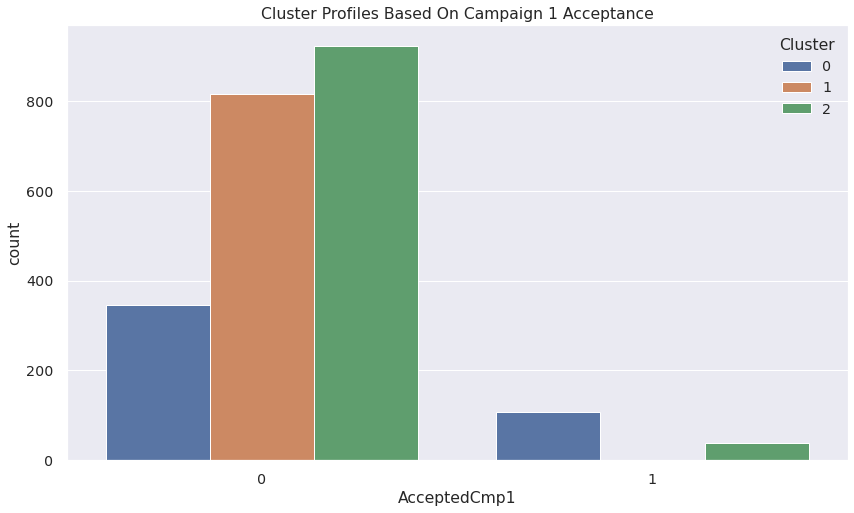

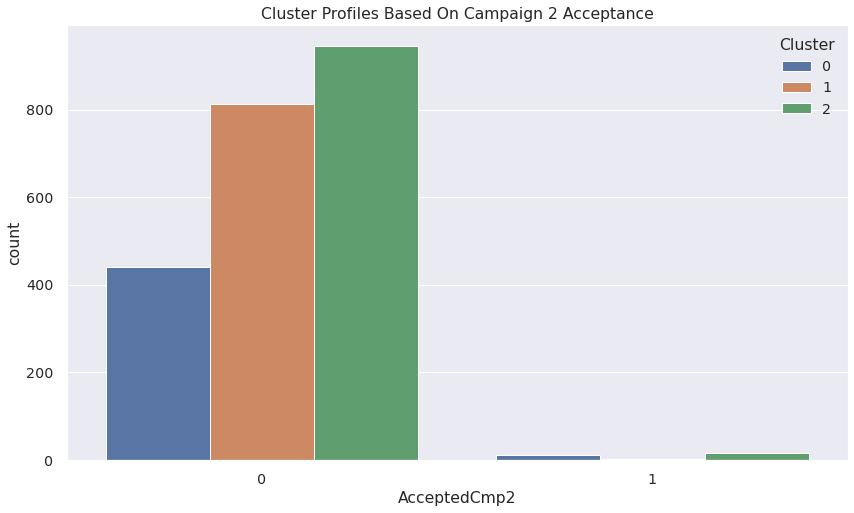

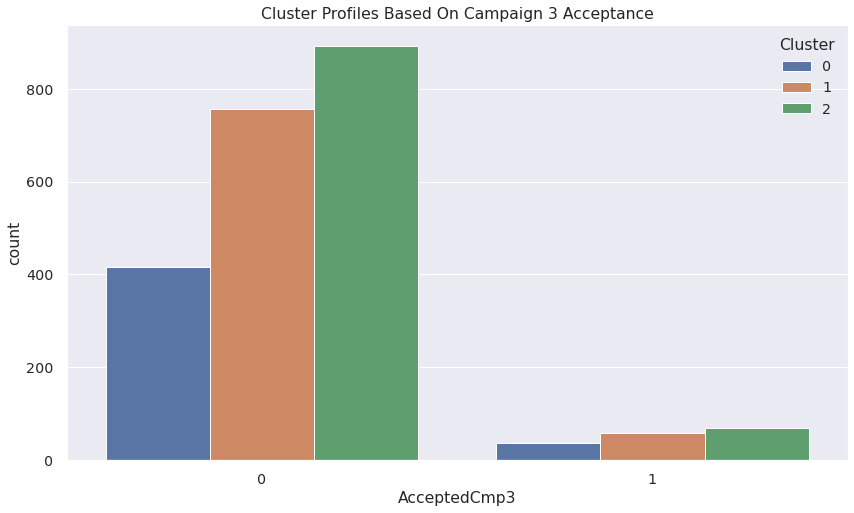

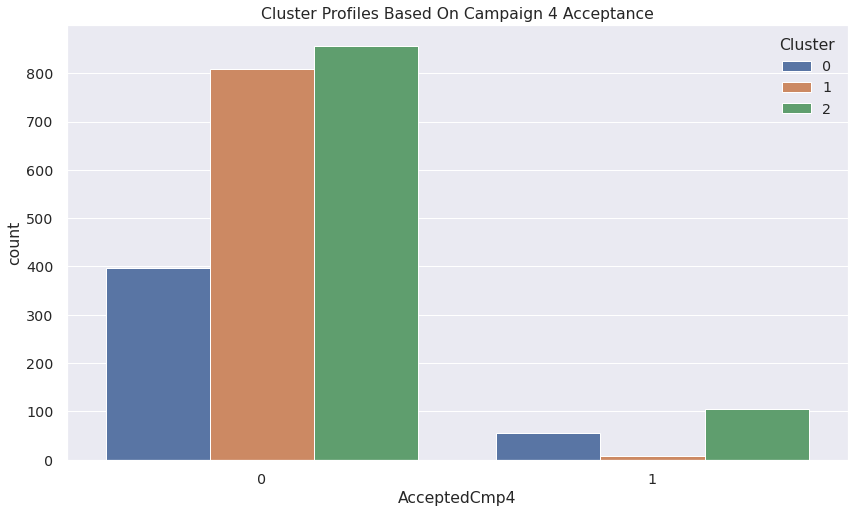

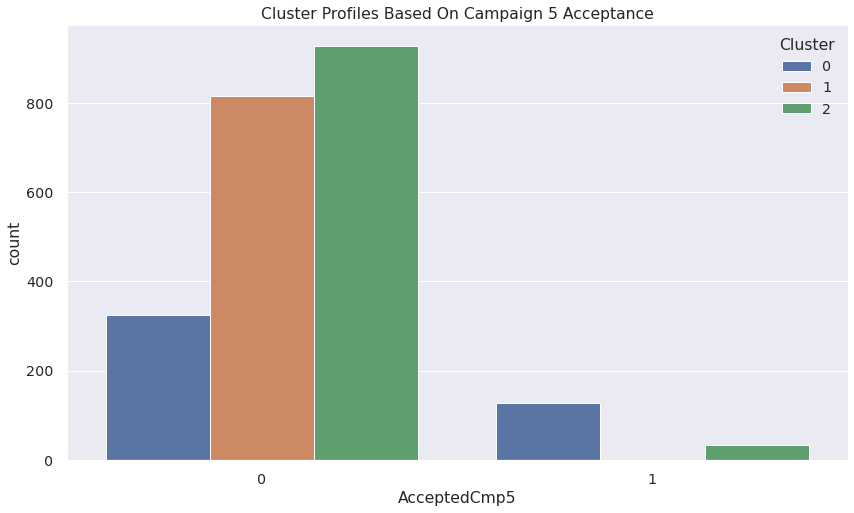

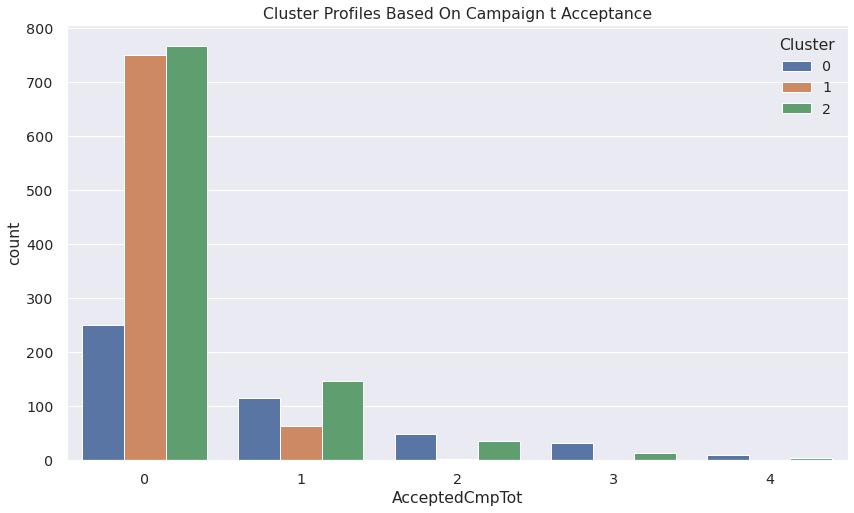

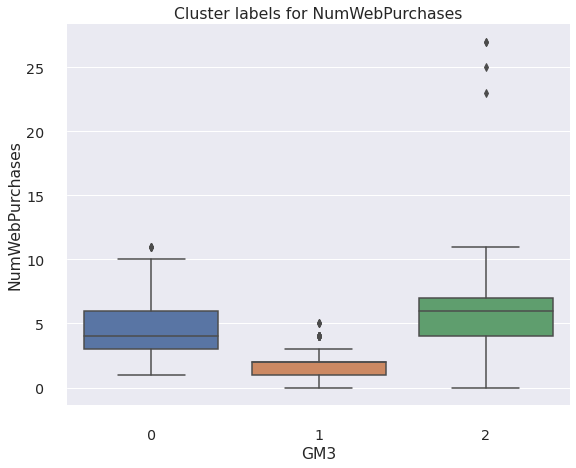

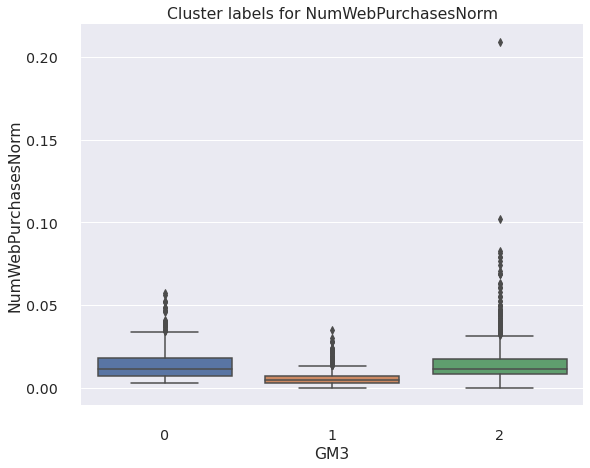

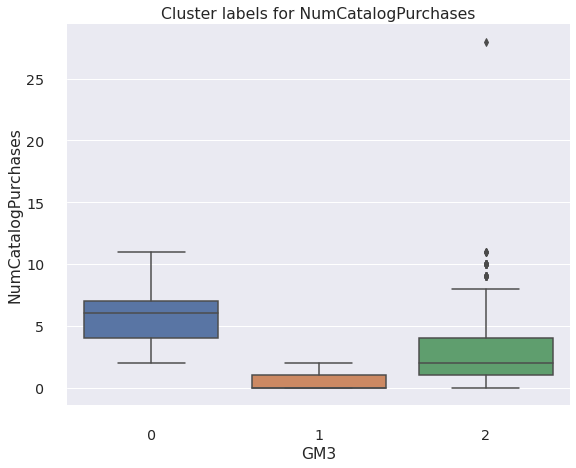

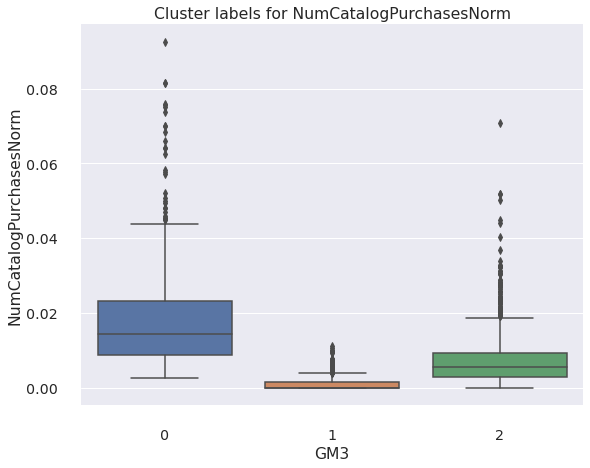

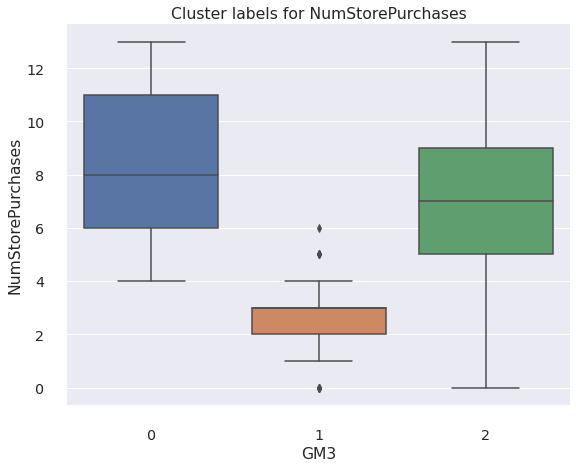

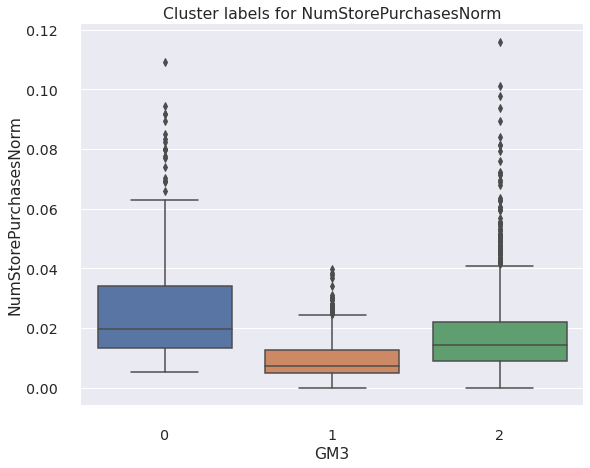

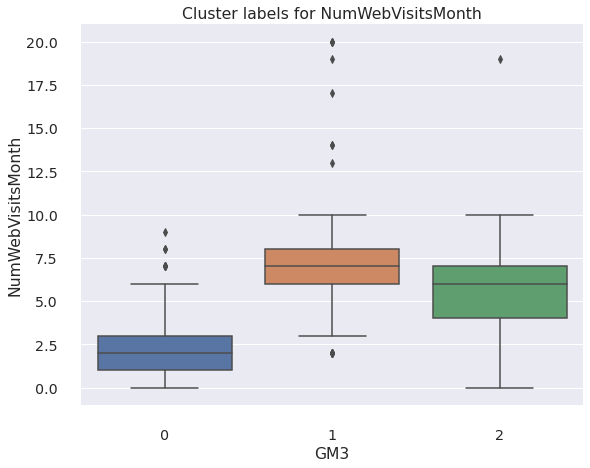

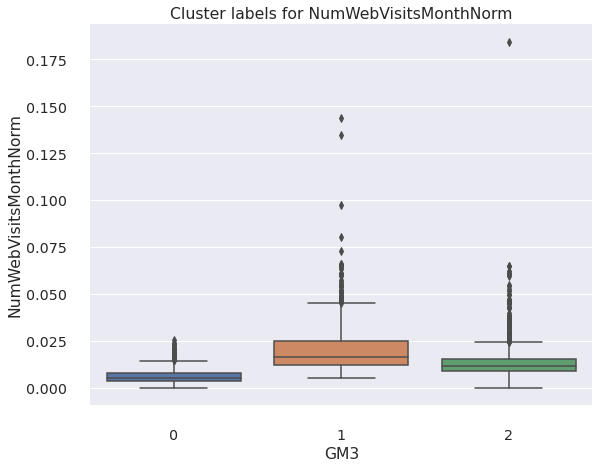

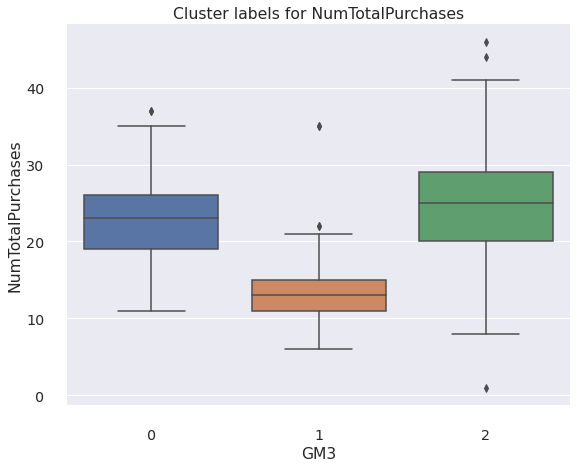

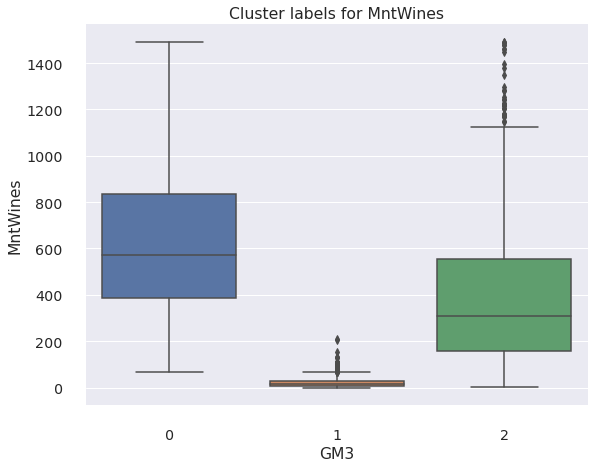

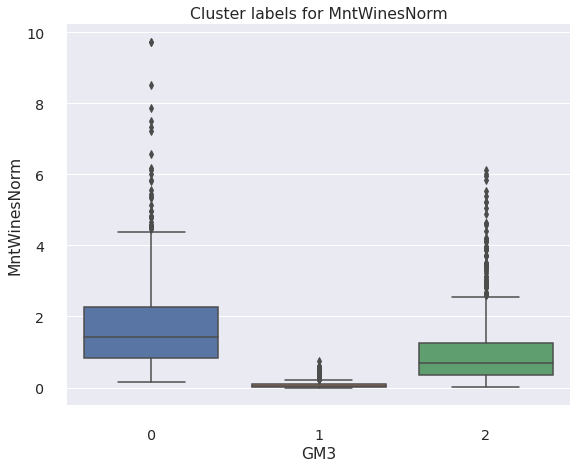

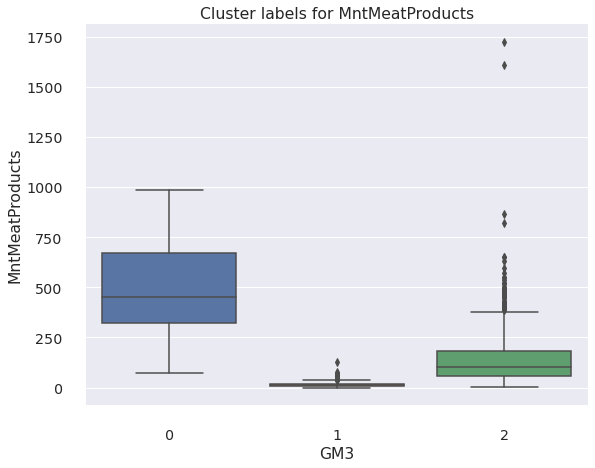

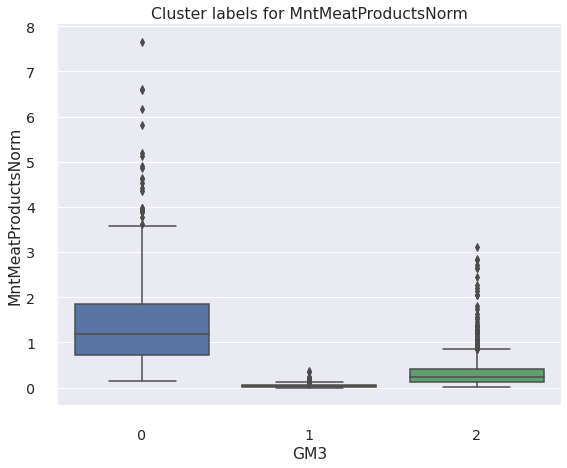

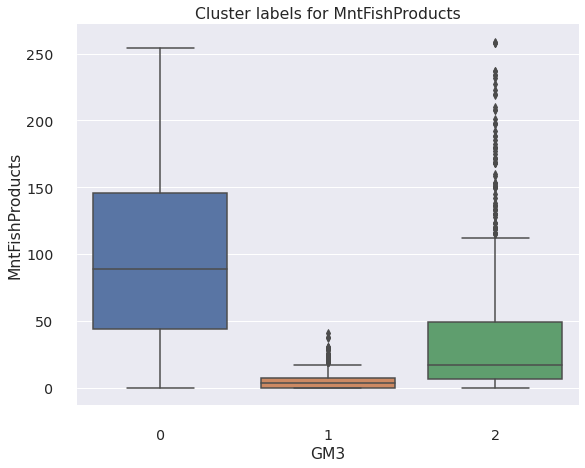

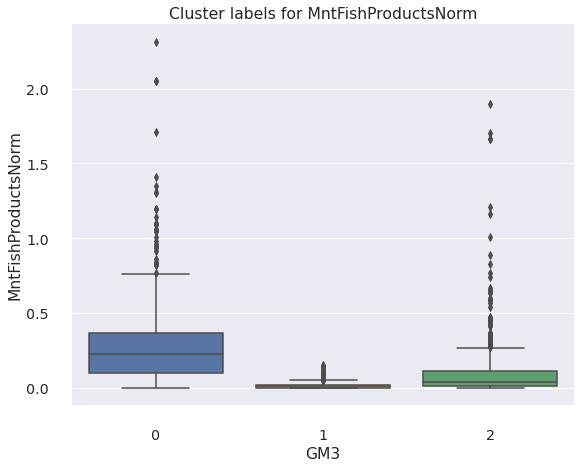

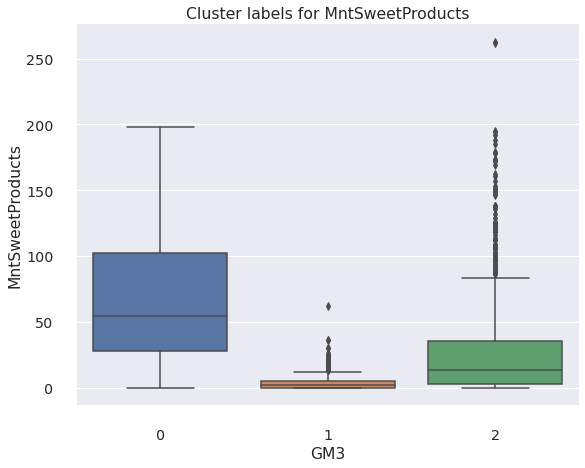

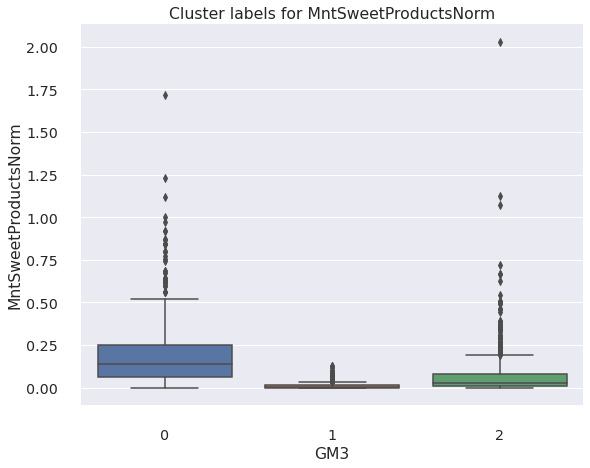

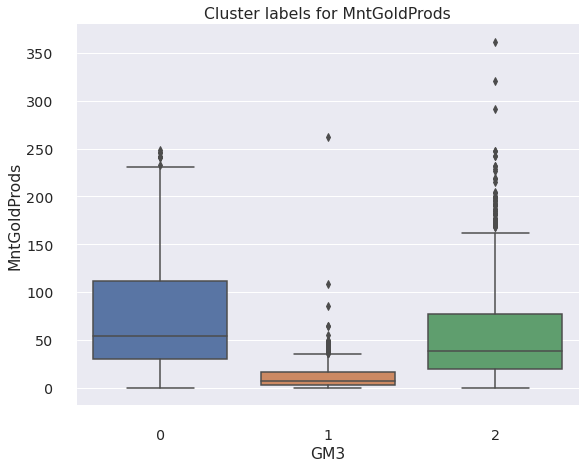

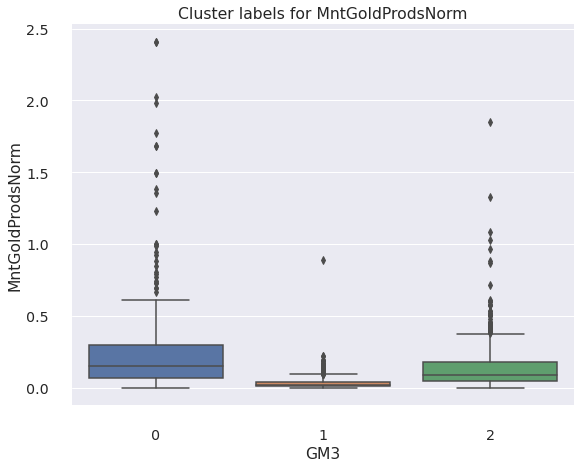

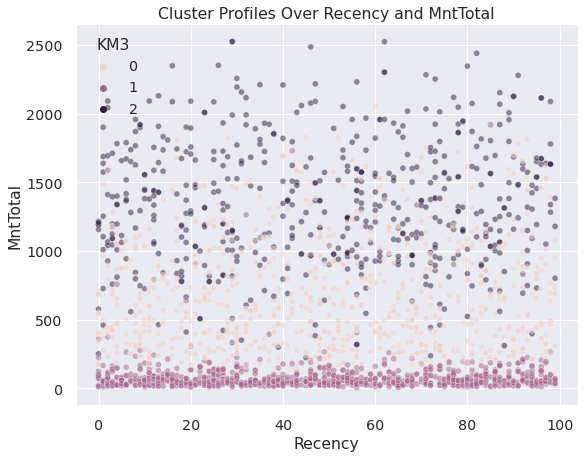

In [19]:
run_plots(data=df,cluster_lab=LABEL)

## Analyzing Similarities/Differences Between GMM and KMeans Results

- Notice that based on total spending, the labels (0,1,2) for KMeans and GMM are similar (eg, 2 represents biggest overall spending)
- Interested in 0 and 2 clusters (biggest spenders)

In [19]:
df.head()

,ID,KM3,GM3,MntTotal,MntSpentNorm,Income,Len_Customer,HasChildren,HasPartner,NumChildren,age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpTot,Response,Complain,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumTotalPurchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,KM2,AC3,AC2,GM2,LogIncome
0,1826,2,0,1190,10.818182,84835.0,110.0,0,0,0,44,0,0,0,0,0,0,1,0,1970,Bachelor,Divorced,0,0,2014-06-16,0,189,104,379,111,189,218,16,1,4,4,6,1,1,0,0,1,0,0,11.348475
1,1,2,2,577,5.198198,57091.0,111.0,0,0,0,53,0,1,0,0,0,1,1,0,1961,Bachelor,Single,0,0,2014-06-15,0,464,5,64,7,0,37,23,1,7,3,7,5,1,0,0,2,0,0,10.952419
2,10476,2,2,251,1.743056,67267.0,144.0,1,1,1,56,0,0,0,0,0,0,0,0,1958,Bachelor,Married,0,1,2014-05-13,0,134,11,59,15,2,30,13,1,3,2,5,2,0,0,0,2,0,0,11.116440
3,1386,1,1,11,0.075342,32474.0,146.0,1,1,2,47,0,0,0,0,0,0,0,0,1967,Bachelor,Together,1,1,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,7,0,0,1,0,1,1,10.388226
4,5371,1,1,91,0.508380,21474.0,179.0,1,0,1,25,0,0,1,0,0,1,1,0,1989,Bachelor,Single,1,0,2014-04-08,0,6,16,24,11,0,34,15,2,3,1,2,7,1,0,1,0,1,1,9.974645
